In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                     #Importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\Student\Downloads\visadataset\Visadataset.csv" )     #Reading dataset.

# 1.Data Profiling

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.info()        #to know the data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
data.shape           # to know the total number of rows and columns.
                     #Observation: there are total 25480 & 12 rows and columns respectively.

(25480, 12)

In [7]:
data.describe()   #to get (count,mean,std,min,Q1,median,Q3,and max) of the numeric features.

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [8]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<AxesSubplot:>

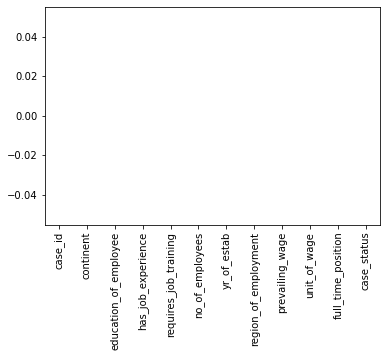

In [9]:
data.isnull().mean().plot.bar()             #this Histogram clearly shows that there are no null values. 

In [54]:
data.yr_of_estab.unique()            #another way of checking null values.
data.no_of_employees.unique()
data.prevailing_wage.unique()         #There sre no null values.

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

# 2.Segregating Numeric and Categorical features

In [18]:
num_col=[i for i in data.columns if data[i].dtypes!='O']   #we can seperate numeric features by this code.
cat_col=[i for i in data.columns if data[i].dtypes=='O']   #we can seperate categorical features by this code.

In [19]:
print(num_col,cat_col)

['no_of_employees', 'yr_of_estab', 'prevailing_wage'] ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [20]:
data[num_col].head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [21]:
data[cat_col].head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified


# cardinality in categorical features

In [22]:
data[cat_col].nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
region_of_employment         5
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

<AxesSubplot:>

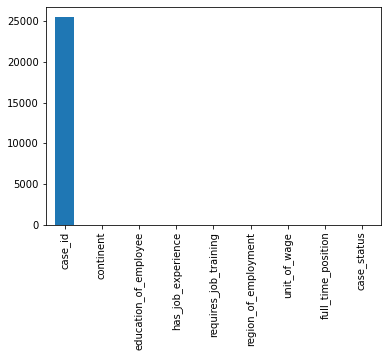

In [28]:
data[cat_col].nunique().plot.bar()      #we can check the cardinality of categorical features.

# 2.Statistical Analysis

# mean,median and mode of numerical features of dataset.

In [11]:
#mean
data[num_col].mean()

no_of_employees     5667.043210
yr_of_estab         1979.409929
prevailing_wage    74455.814592
dtype: float64

In [12]:
#median
data[num_col].median()

no_of_employees     2109.00
yr_of_estab         1997.00
prevailing_wage    70308.21
dtype: float64

In [13]:
#mode
data[num_col].mode().loc[0]

no_of_employees     183.00
yr_of_estab        1998.00
prevailing_wage     100.66
Name: 0, dtype: float64

# Varience & Standard Deviation of Numeric Features

In [14]:
#varience
data[num_col].var()

no_of_employees    5.233996e+08
yr_of_estab        1.794957e+03
prevailing_wage    2.789524e+09
dtype: float64

<BarContainer object of 25480 artists>

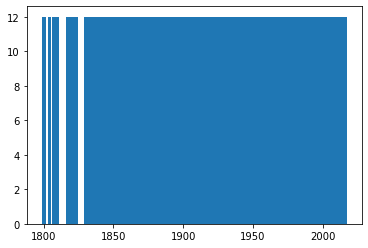

In [34]:
#standard deviation
data[num_col].std()
plt.bar(data['yr_of_estab'],12,width=2)

# covarience of numeric feature

In [17]:
data[num_col].cov()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,5.233996e+08,-17224.155003,-1.150624e+07
yr_of_estab,-1.722416e+04,1794.956681,2.761653e+04
prevailing_wage,-1.150624e+07,27616.530171,2.789524e+09


# correlation of numeric features

In [18]:
data[num_col].corr()     #By default method='pearson'

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [19]:
data[num_col].corr(method='spearman')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.006214,-0.015197
yr_of_estab,-0.006214,1.000000,0.019566
prevailing_wage,-0.015197,0.019566,1.000000


In [20]:
data[num_col].corr(method='kendall')

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.004180,-0.010159
yr_of_estab,-0.004180,1.000000,0.013151
prevailing_wage,-0.010159,0.013151,1.000000


In [53]:
data['no_of_employees'].mean()

5667.043210361067

# Graphical Analysis

<AxesSubplot:xlabel='no_of_employees'>

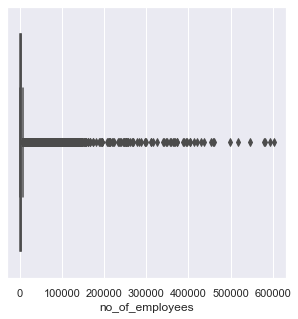

In [96]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(data['no_of_employees'])                                       #ploting boxplot for checking outliers.
     
        
        

In [87]:
 nu

TypeError: 'list' object is not callable

In [82]:
sns.color_palette(n_colors=10,as_cmap=True)

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']